In [1]:
import numpy as np

In [2]:
import random

In [3]:
import matplotlib.pyplot as plt; plt.rcdefaults()

In [4]:
import matplotlib.pyplot as plt


## Our first object in python is a 'list', which can store number, symbol, etc.
## In the question, we are interested in tracking the coordinate of the frog
So we can start with a variable called 'point' whose x coordinate is 1 and y coordinate is 2

In [5]:
point = [1,2]
point[0]

1

## The built-in function print can print out the information stored inside a list
point[0] refers to the first stored element; point[1] the second, so forth and so on

In [6]:
print('x coordinate of point is', point[0])

x coordinate of point is 1


In [7]:
print('y coordinate of point is', point[1])

y coordinate of point is 2


## In the present case and future, we will need random number
### Here, we need a uniformly random variable from 1, 2, 3, 4, each will represent the direction the frog will jump

In [8]:
flip = random.randint(1,4)
flip

3

### Let's say, if flip = 1 then jump right; flip = 2 then jump left; flip = 3 jump up; else jump down
### we can implement the jumping process with the following function, which makes things compact and easier to read.

In [9]:
def do_frog_jump(point):
    array_1_to_4 = np.arange(start = 1, stop =5)
    # the frog will continuing jumping one of the 4 directions within the following while loop 
    while point[0] != 0 and point[0] != 4 and point[1] != 0 and point[1] !=4:
        
        flip = np.random.choice(a = array_1_to_4, p = [0.25, 0.25, 0.3, 0.2])
        
        if flip == 1:
            point[0] += 1
        elif flip == 2:
            point[0] -= 1
        elif flip == 3:
            point[1] += 1
        else:
            point[1] -= 1
            
    # now the frog hit one of the walls, and hence the while loop is terminated.
    # next we need to determine which wall the frog is hitting
    if point[0] == 0:
        return 'Left'
    elif point[0] == 4:
        return 'Right'
    elif point[1] == 0:
        return 'Bottom'
    else:
        return 'Top'
                    

### Now let's do the experiment 100 times and see how many times the frog hit the vertical walls.

In [10]:
# We are going to experiment the frog jumping 100 times
# The values we need to keep track of are: how many times the frog hit which wall


num_simulation = 100

num_trial = 0

num_top = 0
num_bottom = 0
num_left = 0
num_right = 0

while num_trial < num_simulation:
    
    
    # the major simulation is happening within do_frog_jump
    res = do_frog_jump(point)
    
    # keep track of which wall is hit
    if res == 'Right':
        num_right += 1
    elif res == 'Left':
        num_left += 1
    elif res == 'Top':
        num_top += 1
    else:
        num_bottom += 1
        
    # remember to increment the trial, otherwise the while loop is never terminated
    num_trial += 1
    
    # remember to restore the initial position
    point = [1,2]
                

### We can print out the simulation results (e.g. how many times the frog hit the left wall)

In [11]:
[num_top, num_bottom, num_left, num_right]

[29, 16, 46, 9]

### With the simulation result, we are able to infer the probability the frog will hit the vertical walls (left and right walls)

In [12]:
sum([num_left,num_right])/sum([num_top, num_bottom, num_left, num_right])

0.55

### 0.61 is most close to 5/8, so the answer is (B)

# Question 1. What is the probability that the frog will hit the vertical walls if the initial position is at [2,2]?

In [13]:
0.66

0.66

# Question 2. If the frog has 30% chance jumping up, 20% jumping down, 25% jumping left, 25% jumping right, what is the probability hitting the vertical wall for starting at [1,2]

In [14]:
0.63

0.63

# Question 3. Google "Python plot bar diagram" and present your simulation result in terms of bar diagram.

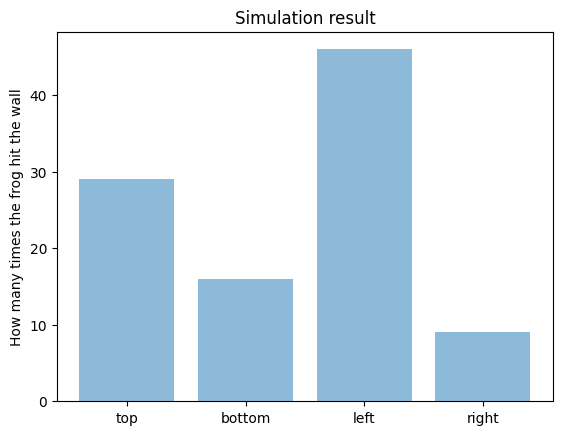

In [15]:
objects = ("top", "bottom", "left", "right")
y_pos = np.arange(len(objects))
performance = [num_top, num_bottom, num_left, num_right]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('How many times the frog hit the wall')
plt.title('Simulation result')

plt.show()


# Bonus Question. In those simulations when the frog hit the right wall, what is the average number of jumps before it hits the wall? (Hint. You may also need to keep track the number of jumps, and try to plot the histogram of those jumps)